In [ ]:
pip install opencv-python


Total number of boxes in /1.jpg: 302


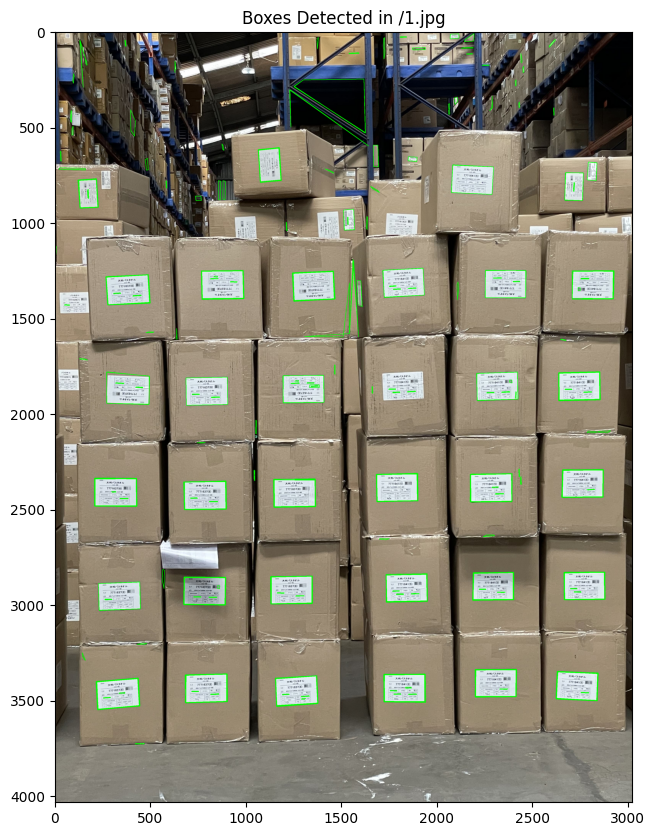

Total number of boxes in /2.jpg: 327


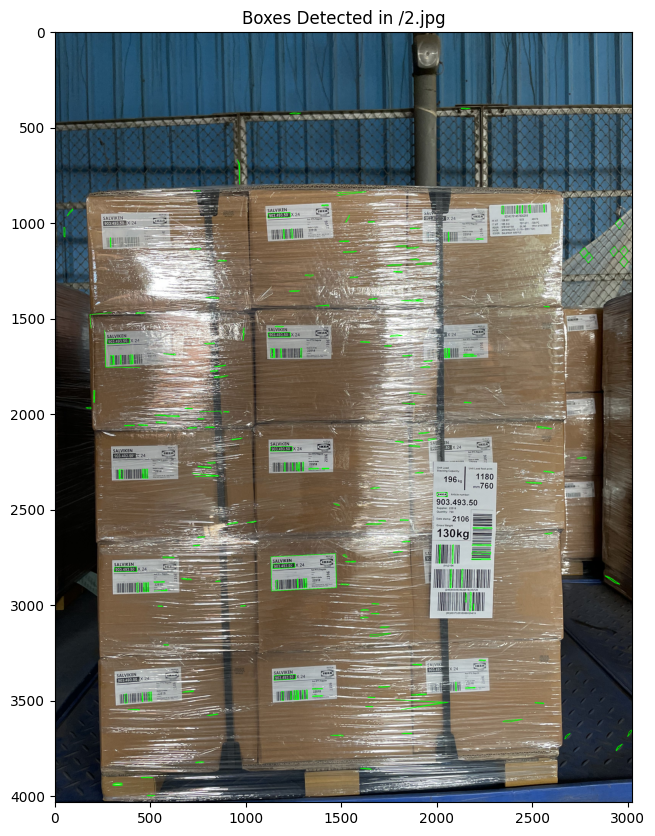

Total number of boxes in /3.jpeg: 0


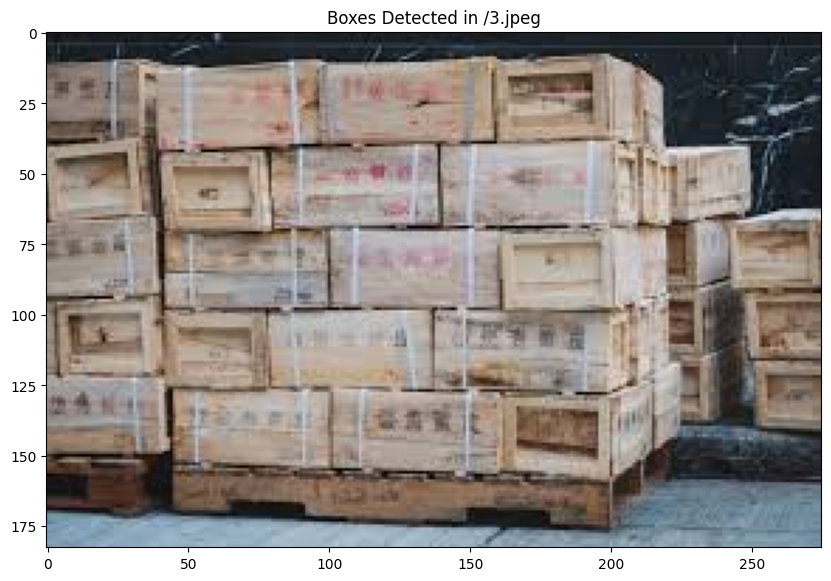

Total number of boxes in /4.jpg: 353


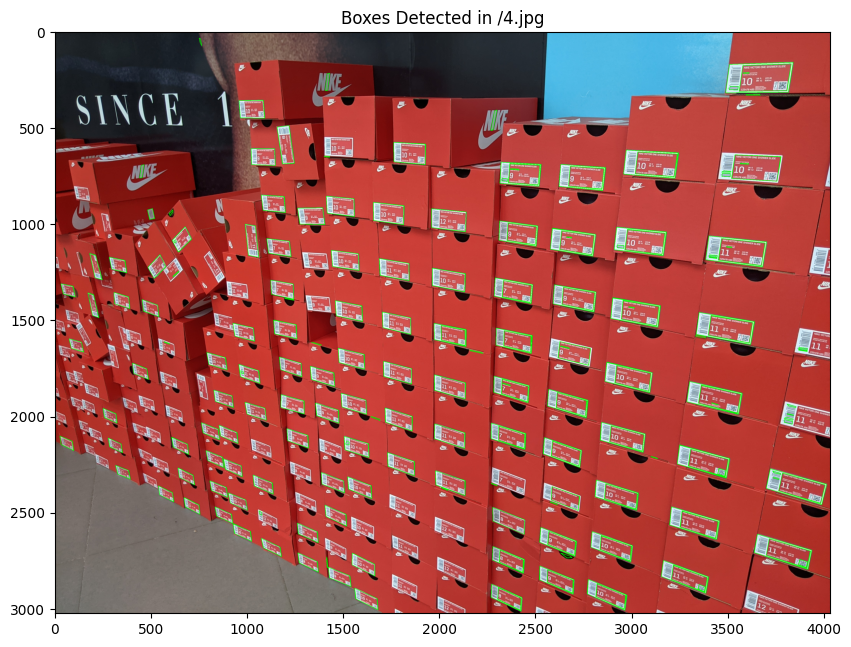

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_boxes(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not open or find the image {image_path}.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply bilateral filtering for noise reduction
    blurred = cv2.bilateralFilter(gray, 11, 17, 17)

    # Apply Gaussian blur to the grayscale image
    blurred = cv2.GaussianBlur(blurred, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Perform morphological operations to clean up image
    kernel = np.ones((3,3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Use edge detection (Canny) on the cleaned image
    edged = cv2.Canny(morph, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize the count of boxes
    box_count = 0

    for contour in contours:
        # Approximate the contour
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)

        # A box has 4 sides
        if len(approx) == 4:
            # Ensure the contour area is large enough to be considered a box
            area = cv2.contourArea(contour)
            if area > 100:  # Adjust this threshold as per your image characteristics
                box_count += 1
                # Draw the contour for visualization (optional)
                cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)

    # Display the result
    print(f"Total number of boxes in {image_path}: {box_count}")

    # Show the image with detected boxes (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Boxes Detected in {image_path}")
    plt.show()

# Paths to the uploaded images
image_paths = [
    "/1.jpg",
    "/2.jpg",
    "/3.jpeg",
    "/4.jpg"
]

# Process each image
for path in image_paths:
    count_boxes(path)
